In [8]:
import IPython
import os
os.system("ls *.md | grep -Ev 'README|audris|ports|info|Preliminary' | sed 's/\.md$//'| sort -u >ids.txt")
with open('ids.txt') as f:
    files = [ x.strip('\n') for x in f.readlines() ]
print (files)

['AlexCauthen', 'Eo300', 'LazerShark', 'Ssoleman', 'TheNinjaneer', 'adeitz', 'adv1023', 'ajusino', 'bdenton4', 'calebmennen', 'cjohn221', 'dmaster1', 'gentryhannah', 'googlay', 'gpickney', 'hkodi', 'ikanter', 'jHolland34', 'jdiamon3', 'jmoscato', 'jmuhamm1', 'jnguye11', 'jqiu1', 'jreyno40', 'jtolen', 'justin_whitt', 'jyoder5', 'kbrown42', 'kevinc9364', 'kmccoy4', 'krissgab', 'ksayarat', 'mgepner', 'philvaccaro', 'player1537', 'pmcknig1', 'pshires', 'sethrausch', 'smcnally', 'srichmo1', 'tchen21', 'tmarsha9', 'toesch', 'tstuessi', 'waltonmacey', 'wrathematics', 'xiaoyugan', 'xshields', 'xzhou13']


In [9]:
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
documents = []

text = ""
for f in files:
  a = open (f+".md")
  str = a.read()
  documents .append(str)
  text = text + " " + str
      
#Do tf.idf magic 
tfidf = TfidfVectorizer().fit_transform(documents)
# no need to normalize, since Vectorizer will return normalized tf-idf
# we may want to see these, e.g., analyze in R
pd .DataFrame.from_records(tfidf.A).to_csv('tfidf.csv')

In [10]:
# Lets see the similarity matrix
# first create labels
idx = {}
for i in range(len(files)):
    idx[i] = files [i]

# Multiply the tfidf matrix to get all pairwise distances    
df = pd. DataFrame.from_records((tfidf * tfidf.T).A,columns=files)

#do pretty printing
pd.options.display.float_format = '{:20,.3f}'.format
df = df.rename(index=idx)
#Output to a file in case we want to look at it separately
df.to_csv("dist.csv")
df

AlexCauthen                Eo300           LazerShark  \
AlexCauthen                 1.000                0.072                0.084   
Eo300                       0.072                1.000                0.106   
LazerShark                  0.084                0.106                1.000   
Ssoleman                    0.229                0.141                0.127   
TheNinjaneer                0.036                0.069                0.114   
adeitz                      0.109                0.150                0.122   
adv1023                     0.052                0.061                0.058   
ajusino                     0.121                0.102                0.115   
bdenton4                    0.069                0.088                0.164   
calebmennen                 0.147                0.140                0.152   
cjohn221                    0.136                0.103                0.091   
dmaster1                    0.140                0.200                0.156   
gentryhannah                0.056                0.117                0.087   
googlay                     0.184                0.081                0.089   
gpickney                    0.223                0.068                0.090   
hkodi                       0.074                0.109                0.069   
ikanter                     0.053                0.030                0.026   
jHolland34                  0.153                0.023                0.118   
jdiamon3                    0.072                0.082                0.121   
jmoscato                    0.035                0.030                0.039   
jmuhamm1                    0.144                0.066                0.064   
jnguye11                    0.182                0.111                0.107   
jqiu1                       0.170                0.153                0.121   
jreyno40                    0.319                0.079                0.084   
jtolen                      0.068                0.080                0.061   
justin_whitt                0.101                0.069                0.101   
jyoder5                     0.153                0.088                0.056   
kbrown42                    0.105                0.061                0.069   
kevinc9364                  0.082                0.240                0.102   
kmccoy4                     0.250                0.065                0.061   
krissgab                    0.094                0.093                0.093   
ksayarat                    0.161                0.074                0.040   
mgepner                     0.112                0.069                0.061   
philvaccaro                 0.037                0.038                0.050   
player1537                  0.122                0.059                0.059   
pmcknig1                    0.130                0.105                0.111   
pshires                     0.049                0.078                0.098   
sethrausch                  0.127                0.134                0.092   
smcnally                    0.142                0.093                0.079   
srichmo1                    0.073                0.171                0.118   
tchen21                     0.083                0.043                0.034   
tmarsha9                    0.128                0.106                0.126   
toesch                      0.080                0.058                0.123   
tstuessi                    0.136                0.157                0.133   
waltonmacey                 0.165                0.141                0.084   
wrathematics                0.036                0.029                0.019   
xiaoyugan                   0.079                0.100                0.070   
xshields                    0.079                0.079                0.100   
xzhou13                     0.105                0.093                0.115   

                         Ssoleman         TheNinjaneer               ad

1.3099230634153132


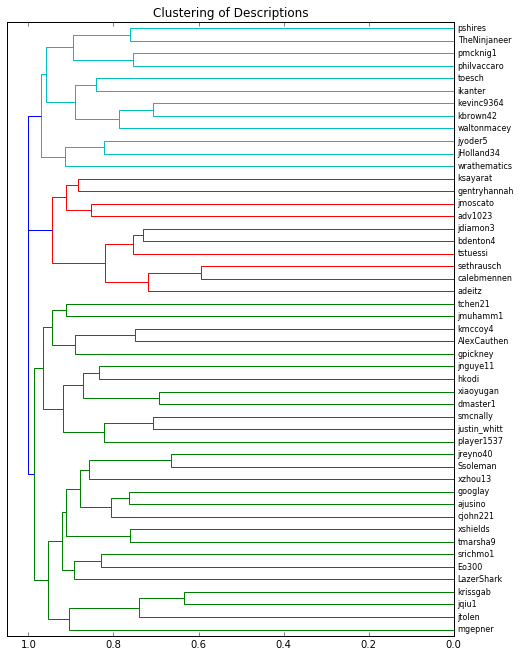

In [11]:
from scipy.cluster.hierarchy import linkage, ward, dendrogram
from scipy.spatial.distance import pdist
import math
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline
# Clean up labels (remove .md at the end)
flab = files
for i in range(len(files)):
    flab[i] = re.sub(r"\.[mM][dD]$", "", files[i])


dist2 = pdist(tfidf.A, 'euclidean')
#dist ij = dist2 [i*(n-1)+j]
ab = np.dot(tfidf.A[0,:]-tfidf.A[38,:],tfidf.A[0,:]-tfidf.A[38,:])
aa = np.dot(tfidf.A[0,:],tfidf.A[0,:])
bb = np.dot(tfidf.A[38,:],tfidf.A[38,:])
print(math.sqrt(ab/aa/bb))


# Calculate cosine distance (clustering needs distance, not similarity)   
dist1 = pdist(tfidf.A, 'cosine')
# Do clustering
linkage_matrix = linkage(dist1,method='complete')
#print(linkage_matrix)
# Plot results
fig = plt.figure(1, figsize=(8, 11))
plt.clf()
ddata = dendrogram(linkage_matrix,
               color_threshold=1,
               p=97,
               labels=flab,
               truncate_mode='none',
               orientation='left',
                show_leaf_counts=True,
               )
plt.title("Clustering of Descriptions")
fig.savefig("teaming.png")


In [12]:
import networkx as nx
import json
nxg = nx.Graph()

for i in range(len(files)-1):
    for j in range(i+1,len(files)):
        if (df.iloc[i,j] > .2):
            nxg.add_edge(flab[i], flab[j], weight=df.iloc[i,j],color='r')
    
print (nxg.nodes())

['kbrown42', 'Ssoleman', 'xzhou13', 'philvaccaro', 'pshires', 'player1537', 'tstuessi', 'adeitz', 'bdenton4', 'kevinc9364', 'waltonmacey', 'smcnally', 'jyoder5', 'sethrausch', 'jtolen', 'TheNinjaneer', 'jreyno40', 'dmaster1', 'xshields', 'srichmo1', 'googlay', 'ajusino', 'jqiu1', 'kmccoy4', 'cjohn221', 'xiaoyugan', 'gentryhannah', 'calebmennen', 'AlexCauthen', 'krissgab', 'gpickney', 'jdiamon3', 'hkodi', 'Eo300', 'pmcknig1', 'tmarsha9', 'justin_whitt']


In [13]:
from networkx.readwrite import json_graph
nld = json_graph.node_link_data(nxg)
json.dump(nld, open('r/students.json','w'))

In [14]:
from IPython.display import IFrame
from IPython.core.display import display
# IPython Notebook can serve files and display them into
# inline frames. Prepend the path with the 'files' prefix.
viz_file = 'files/r/students.html'
display(IFrame(viz_file, '100%', '600px'))